In [31]:
# Learning Practice 2 for the University of Tulsa's QM-7063 Data Mining Course
# Dimension Reduction
# Professor: Dr. Abdulrashid, Spring 2023
# Noah L. Schrick - 1492657

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## Read in Breakfast Cereal data
cereals_df = pd.read_csv('Cereals.csv')


In [3]:
## Part b: Compute mean, median, min, max, and standard deviation for quantitative variables
quan_df = cereals_df[["calories", "sodium", "protein", "fat", "fiber", "carbo", "sugars", "potass", "weight", "cups"]]
pd.DataFrame({'mean': quan_df.mean(),
'median': quan_df.median(),
'min': quan_df.min(),
'max': quan_df.max(),
'sd': quan_df.std()
})

mean  median    min    max         sd
calories  106.883117  110.00  50.00  160.0  19.484119
sodium    159.675325  180.00   0.00  320.0  83.832295
protein     2.545455    3.00   1.00    6.0   1.094790
fat         1.012987    1.00   0.00    5.0   1.006473
fiber       2.151948    2.00   0.00   14.0   2.383364
carbo      14.802632   14.50   5.00   23.0   3.907326
sugars      7.026316    7.00   0.00   15.0   4.378656
potass     98.666667   90.00  15.00  330.0  70.410636
weight      1.029610    1.00   0.50    1.5   0.150477
cups        0.821039    0.75   0.25    1.5   0.232716

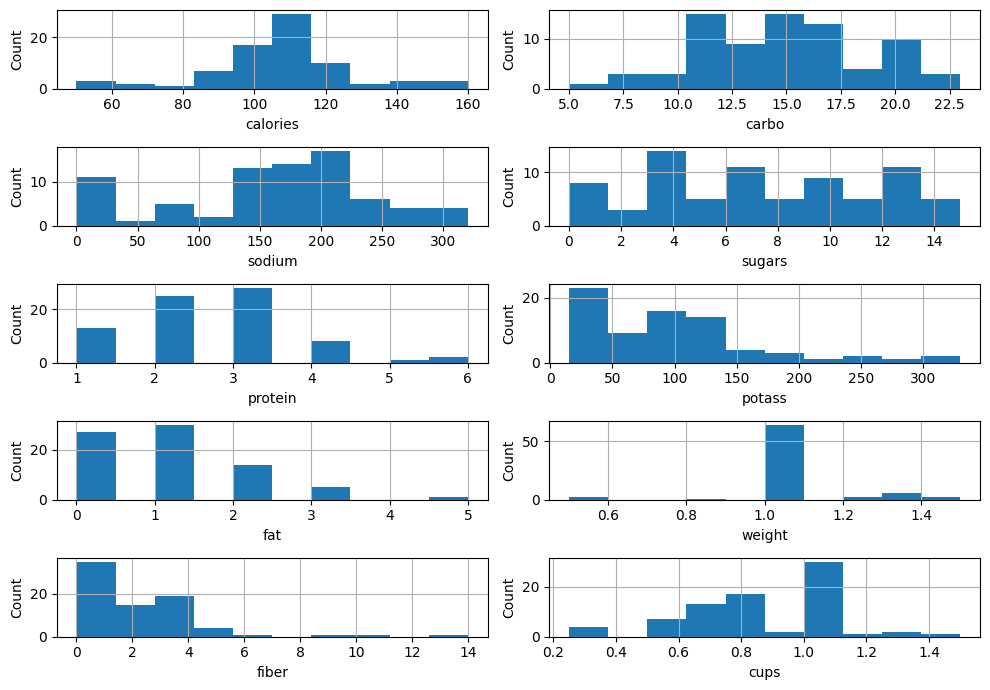

In [22]:
## Part c: Histogram for each of the quant vars
quant_vars = ["calories", "sodium", "protein", "fat", "fiber", "carbo", "sugars", "potass", "weight", "cups"]
rowcounter = 0
colcounter = 0

# 2 columns
cols = 2
rows = len(quant_vars) // cols
if (len(quant_vars) % cols != 0):
    rows += 1

fig, axes = plt.subplots(nrows=int(rows), ncols=int(cols))

for var in quant_vars:
    ax = cereals_df[var].hist(ax=axes[int(rowcounter)][int(colcounter)], figsize=(10,7))
    ax.set_xlabel(var); ax.set_ylabel('Count')  # set x and y-axis label

    if (rowcounter == (rows-1)):
        rowcounter = 0
        colcounter += 1
    else:
        rowcounter += 1

plt.tight_layout()
plt.show()
    


Text(0.5, 1.0, 'Box plot of calories of hot vs cold cereals')

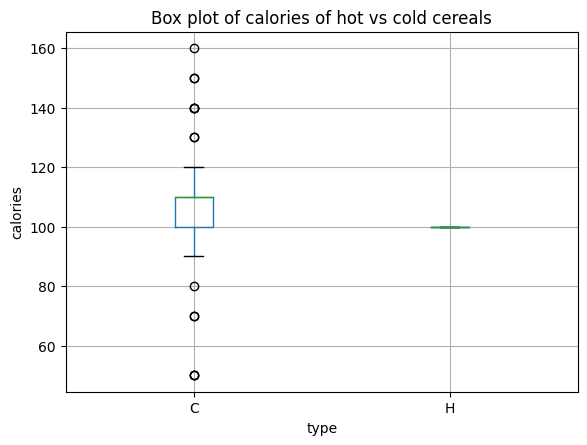

In [27]:
## Part d: Box plot
ax = cereals_df.boxplot(column='calories', by='type')
ax.set_ylabel('calories')
plt.suptitle('')  # Suppress the titles
plt.title('Box plot of calories of hot vs cold cereals')


Text(0.5, 1.0, 'Box plot of rating by shelf height')

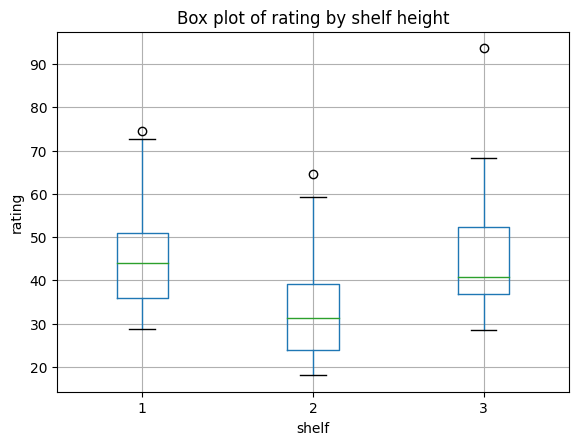

In [28]:
## Part e: Box Plot
ax = cereals_df.boxplot(column='rating', by='shelf')
ax.set_ylabel('rating')
plt.suptitle('')  # Suppress the titles
plt.title('Box plot of rating by shelf height')


          calories  sodium  protein    fat  fiber  carbo  sugars  potass  \
calories     1.000   0.301    0.019  0.499 -0.293  0.258   0.567  -0.072   
sodium       0.301   1.000   -0.055 -0.005 -0.071  0.298   0.059  -0.043   
protein      0.019  -0.055    1.000  0.208  0.500 -0.025  -0.292   0.564   
fat          0.499  -0.005    0.208  1.000  0.017 -0.300   0.302   0.200   
fiber       -0.293  -0.071    0.500  0.017  1.000 -0.380  -0.139   0.912   
carbo        0.258   0.298   -0.025 -0.300 -0.380  1.000  -0.471  -0.365   
sugars       0.567   0.059   -0.292  0.302 -0.139 -0.471   1.000   0.001   
potass      -0.072  -0.043    0.564  0.200  0.912 -0.365   0.001   1.000   
weight       0.696   0.309    0.216  0.215  0.247  0.138   0.456   0.420   
cups         0.087   0.120   -0.244 -0.176 -0.513  0.367  -0.049  -0.502   

          weight   cups  
calories   0.696  0.087  
sodium     0.309  0.120  
protein    0.216 -0.244  
fat        0.215 -0.176  
fiber      0.247 -0.513  
carbo  

<AxesSubplot: >

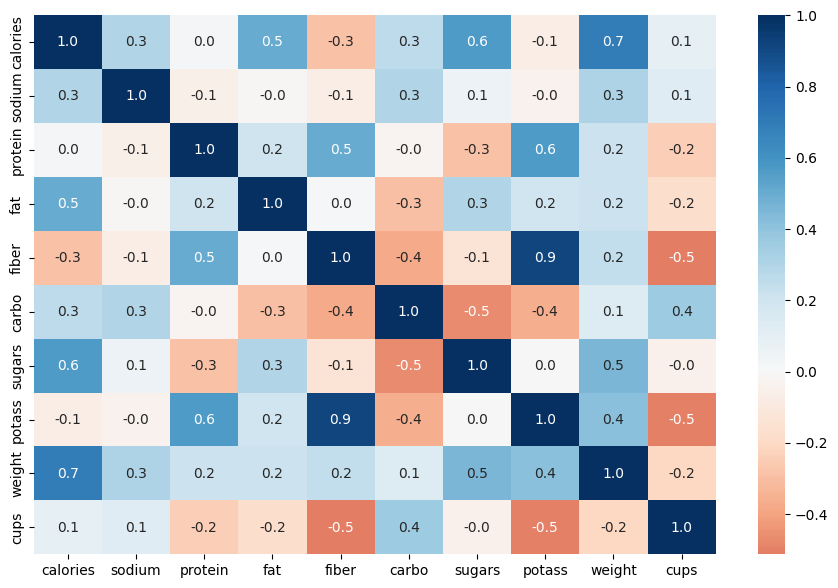

In [36]:
## Part f: correlation table and matrix plot
quan_corr = quan_df.corr().round(3)
print(quan_corr)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(quan_corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)